<a href="https://colab.research.google.com/github/benmsanderson/energybalance/blob/main/get_lrmip.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install nc-time-axis
import nc_time_axis
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import xarray as xr
import requests

from bs4 import BeautifulSoup, SoupStrainer

In [ ]:
  from google.colab import drive
  drive.mount('/content/drive')
  
import os

os.chdir(r"/content/drive/MyDrive/lrmip")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:


pth="https://data.iac.ethz.ch/longrunmip/modelouput/orig/"
fld=['rsut','rlut','rsdt','tas','netTOA']

df = pd.DataFrame(columns=['fld','mdl','sim','yrs','typ','fn'])
for fd in fld:
  page = requests.get(pth+fd+'/global/', auth=('longrunmip', 'data4you'))
#parsing through the api
  soup = BeautifulSoup(page.content, 'html.parser')
  for link in BeautifulSoup(page.content, parse_only=SoupStrainer('a')):
      if link.has_attr('href'):
        if '.nc' in link['href']:
            ts=link['href'].replace('.', '_')
            tmp=ts.split('_')+[link['href']]
            df.loc[len(df)] = tmp
            url=pth+fd+'/global/'+link['href']
            print(url)
            if 0:
              r = requests.get(url, auth=('longrunmip', 'data4you'))
              with open(link['href'], 'wb') as f:
                  f.write(r.content)

https://data.iac.ethz.ch/longrunmip/modelouput/orig/rsut/global/rsut_CCSM3II_abrupt700ppm_3701.nc
https://data.iac.ethz.ch/longrunmip/modelouput/orig/rsut/global/rsut_CCSM3II_abrupt1400ppm_3132.nc
https://data.iac.ethz.ch/longrunmip/modelouput/orig/rsut/global/rsut_CCSM3II_control_3805.nc
https://data.iac.ethz.ch/longrunmip/modelouput/orig/rsut/global/rsut_CCSM3II_lin700ppm_3990.nc
https://data.iac.ethz.ch/longrunmip/modelouput/orig/rsut/global/rsut_CCSM3_abrupt2x_3000.nc
https://data.iac.ethz.ch/longrunmip/modelouput/orig/rsut/global/rsut_CCSM3_abrupt4x_2120.nc
https://data.iac.ethz.ch/longrunmip/modelouput/orig/rsut/global/rsut_CCSM3_abrupt8x_1450.nc
https://data.iac.ethz.ch/longrunmip/modelouput/orig/rsut/global/rsut_CCSM3_control_1530.nc
https://data.iac.ethz.ch/longrunmip/modelouput/orig/rsut/global/rsut_CESM104_abrupt2x_2500.nc
https://data.iac.ethz.ch/longrunmip/modelouput/orig/rsut/global/rsut_CESM104_abrupt4x_5900.nc
https://data.iac.ethz.ch/longrunmip/modelouput/orig/rsut/glo

In [ ]:
mdls=df['mdl'].unique()

In [ ]:
df.loc[(df['mdl'] == mdls[0]) & (df['fld'] == 'tas')]

,fld,mdl,sim,yrs,typ,fn
174,tas,CCSM3II,abrupt700ppm,3701,nc,tas_CCSM3II_abrupt700ppm_3701.nc
175,tas,CCSM3II,abrupt1400ppm,3132,nc,tas_CCSM3II_abrupt1400ppm_3132.nc
176,tas,CCSM3II,control,3805,nc,tas_CCSM3II_control_3805.nc
177,tas,CCSM3II,lin700ppm,3990,nc,tas_CCSM3II_lin700ppm_3990.nc


In [ ]:
dfp = pd.DataFrame(columns=['cnt','4x','patch','scl','matchyr'])

for i,md in enumerate(mdls):
  print(md)
  dt=df.loc[((df['mdl'] == md) & (df['fld'] == 'tas')) & (df['sim'] == 'control') ]
  dt1=dt[dt.yrs.astype(int) == dt.yrs.astype(int).max()]
  tmpctrl=dt1.iloc[0]['fn']
  dt=df.loc[((df['mdl'] == md) & (df['fld'] == 'tas')) & (df['sim'] == 'abrupt4x')]
  if len(dt)==0:
    dt=df.loc[((df['mdl'] == md) & (df['fld'] == 'tas')) & (df['sim'] == 'abrupt1400ppm')]
  dt1=dt[dt.yrs.astype(int) == dt.yrs.astype(int).max()]
  tmp4x=dt1.iloc[0]['fn']
  dfp=dfp.append({'cnt': tmpctrl, '4x':tmp4x,'patch':'','scl':1.0,'matchyr':0}, ignore_index=True)

CCSM3II
CCSM3
CESM104
CNRMCM61
ECEARTH
ECHAM5MPIOM
FAMOUS
GFDLCM3
GFDLESM2M
GISSE2R
HadCM3L
HadGEM2
IPSLCM5A
MIROC32
MPIESM11
MPIESM12


In [ ]:
dfp

,cnt,4x,patch,scl,matchyr
0,tas_CCSM3II_control_3805.nc,tas_CCSM3II_abrupt1400ppm_3132.nc,,1.0,0
1,tas_CCSM3_control_1530.nc,tas_CCSM3_abrupt4x_2120.nc,,1.0,0
2,tas_CESM104_control_1000.nc,tas_CESM104_abrupt4x_5900.nc,,1.0,0
3,tas_CNRMCM61_control_2000.nc,tas_CNRMCM61_abrupt4x_1850.nc,,1.0,0
4,tas_ECEARTH_control_508.nc,tas_ECEARTH_abrupt4x_150.nc,,1.0,0
5,tas_ECHAM5MPIOM_control_100.nc,tas_ECHAM5MPIOM_abrupt4x_1001.nc,,1.0,0
6,tas_FAMOUS_control_3000.nc,tas_FAMOUS_abrupt4x_3000.nc,,1.0,0
7,tas_GFDLCM3_control_5200.nc,tas_GFDLCM3_abrupt4x_150.nc,,1.0,0
8,tas_GFDLESM2M_control_1340.nc,tas_GFDLESM2M_abrupt4x_150.nc,,1.0,0
9,tas_GISSE2R_control_5525.nc,tas_GISSE2R_abrupt4x_5001.nc,,1.0,0


In [ ]:
dfp.at[4,'patch']='tas_ECEARTH_rcp85_1271.nc'

In [ ]:
ds_tas=xr.open_dataset('tas_ECEARTH_rcp85_1271.nc')['tas']
ds_netTOA=xr.open_dataset('netTOA_ECEARTH_rcp85_1271.nc')['netTOA']
ds_4xtas=xr.open_dataset('tas_ECEARTH_abrupt4x_150.nc')['tas']
ds_4xnetTOA=xr.open_dataset('netTOA_ECEARTH_abrupt4x_150.nc')['netTOA']
ds_cnttas=xr.open_dataset('tas_ECEARTH_control_508.nc')['tas']
ds_cntnetTOA=xr.open_dataset('netTOA_ECEARTH_control_508.nc')['netTOA']

In [ ]:
ds_4xnetTOA[-10:].mean()
t=(ds_netTOA.rolling(year=30).mean()*7.4/12.5>ds_4xnetTOA[-10:].mean())
matchyr=np.max([i for i, x in enumerate(t) if x])+5
dfp.at[4,'matchyr']=matchyr
dfp.at[4,'scl']=7.4/12.5



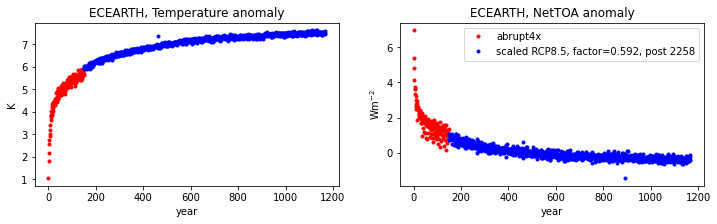

In [ ]:

fig, axes = plt.subplots(ncols=2,nrows=1)
axes = axes.flatten()

fig.set_figheight(3)
fig.set_figwidth(12)

axes[0].plot(ds_4xtas[:]-ds_cnttas.mean(),'r.')
axes[0].plot(150+np.arange(len(ds_tas[matchyr:])),(ds_tas[matchyr:]-ds_cnttas.mean())*7.4/12.5,'b.')
axes[0].set_title('ECEARTH, Temperature anomaly')
axes[0].set_xlabel('year')
axes[0].set_ylabel('K')

p1=axes[1].plot(ds_4xnetTOA[:],'r.')
p2=axes[1].plot(150+np.arange(len(ds_netTOA[matchyr:])),(ds_netTOA[matchyr:])*7.4/12.5,'b.')
axes[1].set_title('ECEARTH, NetTOA anomaly')
axes[1].set_xlabel('year')
axes[1].set_ylabel(r'Wm$^{-2}$')

axes[1].legend([p1[0],p2[0]], ['abrupt4x','scaled RCP8.5, factor='+str(0.592)+', post '+str(matchyr+2005)])
plt.savefig("/content/drive/MyDrive/colab_4xco2/figures/ext_ECEARTH.png", bbox_inches='tight')

In [ ]:
ds_tas=xr.open_dataset('tas_GFDLESM2M_1pct2x_4500.nc')['tas']
ds_4xtas=xr.open_dataset('tas_GFDLESM2M_abrupt4x_150.nc')['tas']
ds_cnttas=xr.open_dataset('tas_GFDLESM2M_control_1340.nc')['tas']
ds_cntnetrlut=xr.open_dataset('rlut_GFDLESM2M_control_1340.nc')['rlut']
ds_4xnetrlut=xr.open_dataset('rlut_GFDLESM2M_abrupt4x_150.nc')['rlut']
ds_netrlut=xr.open_dataset('rlut_GFDLESM2M_1pct2x_4500.nc')['rlut']
ds_cntnetrsut=xr.open_dataset('rsut_GFDLESM2M_control_1340.nc')['rsut']
ds_4xnetrsut=xr.open_dataset('rsut_GFDLESM2M_abrupt4x_150.nc')['rsut']
ds_netrsut=xr.open_dataset('rsut_GFDLESM2M_1pct2x_4500.nc')['rsut']
ds_cntnetrsdt=xr.open_dataset('rsdt_GFDLESM2M_control_1340.nc')['rsdt']
ds_4xnetrsdt=xr.open_dataset('rsdt_GFDLESM2M_abrupt4x_150.nc')['rsdt']
ds_netrsdt=xr.open_dataset('rsdt_GFDLESM2M_1pct2x_4500.nc')['rsdt']

ds_netTOA=-(ds_netrlut+ds_netrsut-ds_netrsdt)
ds_4xnetTOA=-(ds_4xnetrlut+ds_4xnetrsut-ds_4xnetrsdt)



/usr/local/lib/python3.7/dist-packages/xarray/coding/times.py:119: SerializationWarning: Ambiguous reference date string: 1-01-01 00:00:00. The first value is assumed to be the year hence will be padded with zeros to remove the ambiguity (the padded reference date string is: 0001-01-01 00:00:00). To remove this message, remove the ambiguity by padding your reference date strings with zeros.
  warnings.warn(warning_msg, SerializationWarning)
/usr/local/lib/python3.7/dist-packages/xarray/coding/times.py:527: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)
/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  return array(a, dtyp

In [ ]:
ds_4xnetTOA[-10:].mean()
t=(ds_netTOA.rolling(year=30).mean()*2>ds_4xnetTOA[-10:].mean())
matchyr=np.max([i for i, x in enumerate(t) if x])+5
dfp.at[8,'matchyr']=matchyr
dfp.at[8,'scl']=2
dfp.at[8,'patch']='tas_GFDLESM2M_1pct2x_4500.nc'
scl=2

print(matchyr)

214


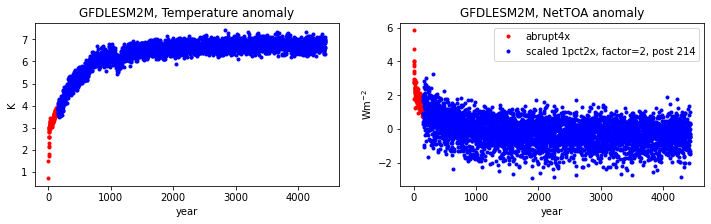

In [ ]:

fig, axes = plt.subplots(ncols=2,nrows=1)
axes = axes.flatten()

fig.set_figheight(3)
fig.set_figwidth(12)

axes[0].plot(ds_4xtas[:]-ds_cnttas.mean(),'r.')
axes[0].plot(150+np.arange(len(ds_tas[matchyr:])),(ds_tas[matchyr:]-ds_cnttas.mean())*scl,'b.')
axes[0].set_title('GFDLESM2M, Temperature anomaly')
axes[0].set_xlabel('year')
axes[0].set_ylabel('K')

p1=axes[1].plot(ds_4xnetTOA[:],'r.')
p2=axes[1].plot(150+np.arange(len(ds_netTOA[matchyr:])),(ds_netTOA[matchyr:])*scl,'b.')
axes[1].set_title('GFDLESM2M, NetTOA anomaly')
axes[1].set_xlabel('year')
axes[1].set_ylabel(r'Wm$^{-2}$')

axes[1].legend([p1[0],p2[0]], ['abrupt4x','scaled 1pct2x, factor='+str(2)+', post '+str(matchyr)])
plt.savefig("/content/drive/MyDrive/colab_4xco2/figures/ext_GFDLESM2M.png", bbox_inches='tight')

In [ ]:
dfp.at[7,'patch']='tas_GFDLCM3_1pct2x_5000.nc'


In [ ]:
ds_tas=xr.open_dataset('tas_GFDLCM3_1pct2x_5000.nc')['tas']
ds_4xtas=xr.open_dataset('tas_GFDLCM3_abrupt4x_150.nc')['tas']
ds_cnttas=xr.open_dataset('tas_GFDLCM3_control_5200.nc')['tas']
ds_cntnetrlut=xr.open_dataset('rlut_GFDLCM3_control_5200.nc')['rlut']
ds_4xnetrlut=xr.open_dataset('rlut_GFDLCM3_abrupt4x_150.nc')['rlut']
ds_netrlut=xr.open_dataset('rlut_GFDLCM3_1pct2x_5000.nc')['rlut']
ds_cntnetrsut=xr.open_dataset('rsut_GFDLCM3_control_5200.nc')['rsut']
ds_4xnetrsut=xr.open_dataset('rsut_GFDLCM3_abrupt4x_150.nc')['rsut']
ds_netrsut=xr.open_dataset('rsut_GFDLCM3_1pct2x_5000.nc')['rsut']
ds_cntnetrsdt=xr.open_dataset('rsdt_GFDLCM3_control_5200.nc')['rsdt']
ds_4xnetrsdt=xr.open_dataset('rsdt_GFDLCM3_abrupt4x_150.nc')['rsdt']
ds_netrsdt=xr.open_dataset('rsdt_GFDLCM3_1pct2x_5000.nc')['rsdt']

ds_netTOA=-(ds_netrlut+ds_netrsut-ds_netrsdt)
ds_4xnetTOA=-(ds_4xnetrlut+ds_4xnetrsut-ds_4xnetrsdt)


/usr/local/lib/python3.7/dist-packages/xarray/coding/times.py:119: SerializationWarning: Ambiguous reference date string: 1-01-01 00:00:00. The first value is assumed to be the year hence will be padded with zeros to remove the ambiguity (the padded reference date string is: 0001-01-01 00:00:00). To remove this message, remove the ambiguity by padding your reference date strings with zeros.
  warnings.warn(warning_msg, SerializationWarning)
/usr/local/lib/python3.7/dist-packages/xarray/coding/times.py:527: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)
/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  return array(a, dtyp

In [ ]:
ds_4xnetTOA[-10:].mean()
t=(ds_netTOA.rolling(year=30).mean()*2>ds_4xnetTOA[-10:].mean())
matchyr=np.max([i for i, x in enumerate(t) if x])+5
dfp.at[7,'matchyr']=matchyr
dfp.at[7,'scl']=2
dfp.at[7,'patch']='tas_GFDLCM3_1pct2x_5000.nc'
print(matchyr)


294


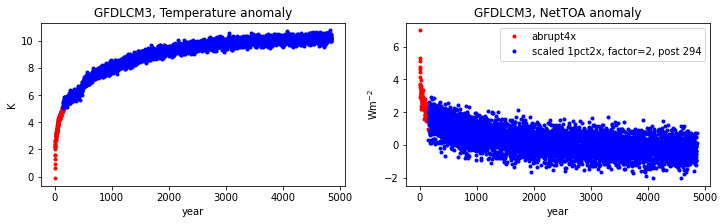

In [ ]:

fig, axes = plt.subplots(ncols=2,nrows=1)
axes = axes.flatten()

fig.set_figheight(3)
fig.set_figwidth(12)

axes[0].plot(ds_4xtas[:]-ds_cnttas.mean(),'r.')
axes[0].plot(150+np.arange(len(ds_tas[matchyr:])),(ds_tas[matchyr:]-ds_cnttas.mean())*scl,'b.')
axes[0].set_title('GFDLCM3, Temperature anomaly')
axes[0].set_xlabel('year')
axes[0].set_ylabel('K')

p1=axes[1].plot(ds_4xnetTOA[:],'r.')
p2=axes[1].plot(150+np.arange(len(ds_netTOA[matchyr:])),(ds_netTOA[matchyr:])*scl,'b.')
axes[1].set_title('GFDLCM3, NetTOA anomaly')
axes[1].set_xlabel('year')
axes[1].set_ylabel(r'Wm$^{-2}$')

axes[1].legend([p1[0],p2[0]], ['abrupt4x','scaled 1pct2x, factor='+str(2)+', post '+str(matchyr)])
plt.savefig("/content/drive/MyDrive/colab_4xco2/figures/ext_GFDLCM3.png", bbox_inches='tight')

In [ ]:
ds_tas=xr.open_dataset('tas_MIROC32_1pct4x_2002.nc')['tas']
ds_4xtas=xr.open_dataset('tas_MIROC32_abrupt4x_150.nc')['tas']
ds_cnttas=xr.open_dataset('tas_MIROC32_control_681.nc')['tas']
ds_cntnetrlut=xr.open_dataset('rlut_MIROC32_control_681.nc')['rlut']
ds_4xnetrlut=xr.open_dataset('rlut_MIROC32_abrupt4x_150.nc')['rlut']
ds_netrlut=xr.open_dataset('rlut_MIROC32_1pct4x_2002.nc')['rlut']
ds_cntnetrsut=xr.open_dataset('rsut_MIROC32_control_681.nc')['rsut']
ds_4xnetrsut=xr.open_dataset('rsut_MIROC32_abrupt4x_150.nc')['rsut']
ds_netrsut=xr.open_dataset('rsut_MIROC32_1pct4x_2002.nc')['rsut']
ds_cntnetrsdt=xr.open_dataset('rsdt_MIROC32_control_681.nc')['rsdt']
ds_4xnetrsdt=xr.open_dataset('rsdt_MIROC32_abrupt4x_150.nc')['rsdt']
ds_netrsdt=xr.open_dataset('rsdt_MIROC32_1pct4x_2002.nc')['rsdt']

ds_netTOA=-(ds_netrlut+ds_netrsut-ds_netrsdt)
ds_4xnetTOA=-(ds_4xnetrlut+ds_4xnetrsut-ds_4xnetrsdt)


In [ ]:
ds_4xnetTOA[-10:].mean()
t=(ds_netTOA.rolling(year=30).mean()>ds_4xnetTOA[-10:].mean())
matchyr=np.max([i for i, x in enumerate(t) if x])+5
dfp.at[13,'matchyr']=matchyr
dfp.at[13,'scl']=1
dfp.at[13,'patch']='tas_MIROC32_1pct4x_2002.nc'
scl=1

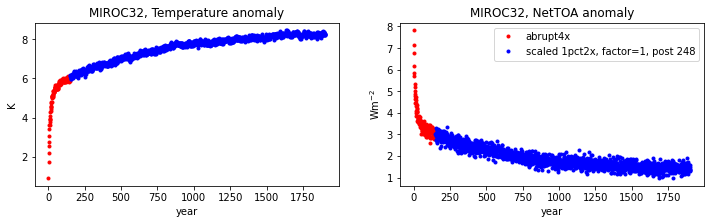

In [ ]:

fig, axes = plt.subplots(ncols=2,nrows=1)
axes = axes.flatten()

fig.set_figheight(3)
fig.set_figwidth(12)

axes[0].plot(ds_4xtas[:]-ds_cnttas.mean(),'r.')
axes[0].plot(150+np.arange(len(ds_tas[matchyr:])),(ds_tas[matchyr:]-ds_cnttas.mean())*scl,'b.')
axes[0].set_title('MIROC32, Temperature anomaly')
axes[0].set_xlabel('year')
axes[0].set_ylabel('K')

p1=axes[1].plot(ds_4xnetTOA[:],'r.')
p2=axes[1].plot(150+np.arange(len(ds_netTOA[matchyr:])),(ds_netTOA[matchyr:])*scl,'b.')
axes[1].set_title('MIROC32, NetTOA anomaly')
axes[1].set_xlabel('year')
axes[1].set_ylabel(r'Wm$^{-2}$')

axes[1].legend([p1[0],p2[0]], ['abrupt4x','scaled 1pct2x, factor='+str(1)+', post '+str(matchyr)])
plt.savefig("/content/drive/MyDrive/colab_4xco2/figures/ext_MIROC32.png", bbox_inches='tight')

In [ ]:
dfp

,cnt,4x,patch,scl,matchyr
0,tas_CCSM3II_control_3805.nc,tas_CCSM3II_abrupt1400ppm_3132.nc,,1.000,0
1,tas_CCSM3_control_1530.nc,tas_CCSM3_abrupt4x_2120.nc,,1.000,0
2,tas_CESM104_control_1000.nc,tas_CESM104_abrupt4x_5900.nc,,1.000,0
3,tas_CNRMCM61_control_2000.nc,tas_CNRMCM61_abrupt4x_1850.nc,,1.000,0
4,tas_ECEARTH_control_508.nc,tas_ECEARTH_abrupt4x_150.nc,tas_ECEARTH_rcp85_1271.nc,0.592,253
5,tas_ECHAM5MPIOM_control_100.nc,tas_ECHAM5MPIOM_abrupt4x_1001.nc,,1.000,0
6,tas_FAMOUS_control_3000.nc,tas_FAMOUS_abrupt4x_3000.nc,,1.000,0
7,tas_GFDLCM3_control_5200.nc,tas_GFDLCM3_abrupt4x_150.nc,tas_GFDLCM3_1pct2x_5000.nc,2.000,294
8,tas_GFDLESM2M_control_1340.nc,tas_GFDLESM2M_abrupt4x_150.nc,tas_GFDLESM2M_1pct2x_4500.nc,2.000,214
9,tas_GISSE2R_control_5525.nc,tas_GISSE2R_abrupt4x_5001.nc,,1.000,0


In [ ]:
import regex as re
flds=['tas','rlut','rsut','rsdt']
dexp=[]
dcnt=[]
for j,fld in enumerate(flds):
  
  for i,mdl in enumerate(mdls):
    ds_cnttas=xr.open_dataset(re.sub('tas', fld, dfp.loc[i].cnt))[fld]
    #if fld=='tas':
    bs=ds_cnttas.mean()
    #else:
    #bs=0

    if 'time' in ds_cnttas.coords:
              ds_cnttas=ds_cnttas.rename({'time': 'year'})
    ds_cnttas=ds_cnttas.pad(year=(0,6000-len(ds_cnttas)))
    ds_cnttas.coords['year']=xr.cftime_range(start="1850", periods=6000, freq="Y", calendar="noleap")

    ds_4xtas=xr.open_dataset(re.sub('tas', fld, dfp.loc[i]['4x']))[fld]-bs
    if 'time' in ds_4xtas.coords:
              ds_4xtas=ds_4xtas.rename({'time': 'year'})
    if len(dfp.loc[i]['patch'])>0:
      matchyr=dfp.at[i,'matchyr']
      scl=dfp.at[i,'scl']
      ds_pttas=(xr.open_dataset(re.sub('tas', fld, dfp.loc[i]['patch']))[fld][matchyr:]-bs)*scl
      ds_4xtas=xr.concat([ds_4xtas[0:150],ds_pttas],'year')
    ds_4xtas=ds_4xtas.pad(year=(0,6000-len(ds_4xtas)))
    
    ds_4xtas.coords['year']=xr.cftime_range(start="1850", periods=6000, freq="Y", calendar="noleap")
    ds_4xtas=ds_4xtas+bs
    if i==0:  
      dac=ds_4xtas
      dcc=ds_cnttas

    else:
      dac=xr.concat([dac,ds_4xtas],'ens',coords='minimal',compat='override')
      dcc=xr.concat([dcc,ds_cnttas],'ens',coords='minimal',compat='override')
  dexp.append(dac)
  dcnt.append(dcc)



/usr/local/lib/python3.7/dist-packages/xarray/coding/times.py:119: SerializationWarning: Ambiguous reference date string: 1-01-01 00:00:00. The first value is assumed to be the year hence will be padded with zeros to remove the ambiguity (the padded reference date string is: 0001-01-01 00:00:00). To remove this message, remove the ambiguity by padding your reference date strings with zeros.
  warnings.warn(warning_msg, SerializationWarning)
/usr/local/lib/python3.7/dist-packages/xarray/coding/times.py:527: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)
/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  return array(a, dtyp

In [ ]:
tmp4=xr.merge(dexp)
tmp4.to_netcdf('/content/drive/MyDrive/colab_4xco2/lrmip2_4x.nc')
tmpc=xr.merge(dcnt)
tmpc.to_netcdf('/content/drive/MyDrive/colab_4xco2/lrmip2_cnt.nc')



In [ ]:
tmp4

<xarray.Dataset>
Dimensions:  (ens: 16, year: 6000)
Coordinates:
  * year     (year) object 1850-12-31 00:00:00 ... 7849-12-31 00:00:00
Dimensions without coordinates: ens
Data variables:
    tas      (ens, year) float32 286.2 286.9 287.2 287.5 ... nan nan nan nan
    rlut     (ens, year) float32 227.1 228.6 228.7 229.4 ... nan nan nan nan
    rsut     (ens, year) float32 107.2 107.8 107.9 108.1 ... nan nan nan nan
    rsdt     (ens, year) float32 341.4 341.4 341.4 341.4 ... nan nan nan nan

In [ ]:
mdls

array(['CCSM3II', 'CCSM3', 'CESM104', 'CNRMCM61', 'ECEARTH',
       'ECHAM5MPIOM', 'FAMOUS', 'GFDLCM3', 'GFDLESM2M', 'GISSE2R',
       'HadCM3L', 'HadGEM2', 'IPSLCM5A', 'MIROC32', 'MPIESM11',
       'MPIESM12'], dtype=object)

In [ ]:
import pickle
pickle.dump(mdls, open( "/content/drive/MyDrive/colab_4xco2/mdls_lrmip.pkl", "wb" ) )

In [ ]:
tmp4

<xarray.Dataset>
Dimensions:  (ens: 16, year: 6000)
Coordinates:
  * year     (year) object 1850-12-31 00:00:00 ... 7849-12-31 00:00:00
Dimensions without coordinates: ens
Data variables:
    tas      (ens, year) float32 286.2 286.9 287.2 287.5 ... nan nan nan nan
    rlut     (ens, year) float32 227.1 228.6 228.7 229.4 ... nan nan nan nan
    rsut     (ens, year) float32 107.2 107.8 107.9 108.1 ... nan nan nan nan
    rsdt     (ens, year) float32 341.4 341.4 341.4 341.4 ... nan nan nan nan

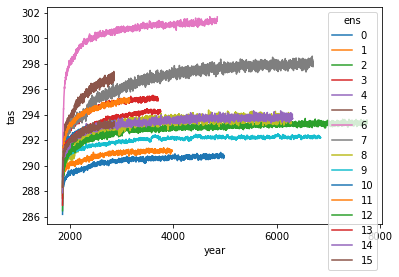

In [ ]:
tmp4.tas.plot.line(x='year')